In [1]:
import os
import sklearn
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn import svm

In [2]:
for dirname, _, filenames in os.walk('.'):
        for filename in filenames:
            print(os.path.join(dirname, filename))

.\iris.csv
.\Studing Scikit.ipynb
.\.ipynb_checkpoints\Studing Scikit-checkpoint.ipynb


In [3]:
iris = pd.read_csv('.\iris.csv')

data = {
    "data": list(),
    "target": list()
}

data_list = list()
target_list = list()

In [4]:
for index, row in iris.iterrows():
    row_data = list()
    
    row_data.append(row["sepal.length"])
    row_data.append(row["sepal.width"])
    row_data.append(row["petal.length"])
    row_data.append(row["petal.width"])
    
    data_list.append(row_data)
    target_list.append(row["variety"])
    
data_array = np.array(data_list)
target_array = np.array(target_list)
data["data"] = data_array
data["target"] = target_array

In [5]:
X = data["data"][:,:2]
Y = data["target"]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=0)

In [6]:
clf = svm.SVC(kernel="poly", degree=3, gamma="auto", C=1).fit(X_train, y_train)
model = clf

In [7]:
prediction = np.array([1.3, 5.2])
clf.predict([prediction])

array(['Setosa'], dtype='<U10')

In [8]:
y = list()
for element in Y:
    if element == 'Setosa':
        y.append(0)
    elif element == 'Versicolor':
        y.append(1)
    elif element == 'Virginica':
        y.append(2)
print(y)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]


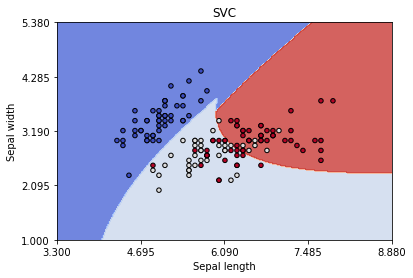

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets


def make_meshgrid(x, y, h=0.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    
    z = list()
    for element in Z:
        if element == 'Setosa':
            z.append(0)
        elif element == 'Versicolor':
            z.append(1)
        elif element == 'Virginica':
            z.append(2)
    z = np.array(z)
    z = z.reshape(xx.shape)
    out = ax.contourf(xx, yy, z, **params)
    return out

fig, ax = plt.subplots()

X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

x_linspace = np.linspace(xx.min(),xx.max(), num = 5)
y_linspace = np.linspace(yy.min(),yy.max(), num = 5)

plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors="k")
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_xlabel("Sepal length")
ax.set_ylabel("Sepal width")
ax.set_xticks(x_linspace)
ax.set_yticks(y_linspace)
ax.set_title("SVC")

plt.show()